In [1]:
## Import necessary packages
import os
from urllib.request import urlretrieve 
import zipfile
import numpy as np 
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import requests

In [2]:
# Converting batch and Ramna data into Dataframe
import pandas as pd
data = pd.read_csv('D:/Biopharmaceutical_Project/data/100_Batches_IndPenSim_V3.csv') 
# Converting summary statisic data into Dataframe
data_summary = pd.read_csv('D:/Biopharmaceutical_Project/data/100_Batches_IndPenSim_Statistics.csv')

In [3]:
data

,Time (h),Aeration rate(Fg:L/h),Agitator RPM(RPM:RPM),Sugar feed rate(Fs:L/h),Acid flow rate(Fa:L/h),Base flow rate(Fb:L/h),Heating/cooling water flow rate(Fc:L/h),Heating water flow rate(Fh:L/h),Water for injection/dilution(Fw:L/h),Air head pressure(pressure:bar),...,210,209,208,207,206,205,204,203,202,201
0,0.2,30,100,8,0.0000,30.1180,9.8335,0.00010,0,0.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
1,0.4,30,100,8,0.0000,51.2210,18.1550,0.00010,0,0.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
2,0.6,30,100,8,0.0000,54.3020,9.5982,0.00010,0,0.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
3,0.8,30,100,8,0.0000,37.8160,4.3395,0.00010,0,0.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
4,1.0,30,100,8,0.5181,18.9080,1.1045,0.00010,0,0.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113930,229.2,65,100,80,0.0000,12.9000,33.5860,5.93590,250,0.9,...,816050.0,823390.0,830160.0,835530.0,839140.0,840570.0,840160.0,838580.0,NaN,NaN
113931,229.4,65,100,80,0.0000,10.0470,10.0760,98.83400,250,0.9,...,773520.0,780840.0,787470.0,792750.0,796220.0,797610.0,797270.0,796020.0,NaN,NaN
113932,229.6,65,100,80,0.0000,7.3609,69.3450,9.88340,250,0.9,...,788240.0,795550.0,802190.0,807420.0,810590.0,811660.0,811210.0,809960.0,NaN,NaN
113933,229.8,65,100,80,0.0000,6.2794,38.6100,0.98834,250,0.9,...,781180.0,788420.0,794950.0,800140.0,803610.0,804900.0,804490.0,803410.0,NaN,NaN


# PROBLEM 2

In [8]:
data1 = data

In [9]:
data1 = np.split(data1, [data1.columns.get_loc("2400")], axis=1)
data1

[        Time (h)  Aeration rate(Fg:L/h)  Agitator RPM(RPM:RPM)  \
 0            0.2                   30.0                  100.0   
 1            0.4                   30.0                  100.0   
 2            0.6                   30.0                  100.0   
 3            0.8                   30.0                  100.0   
 4            1.0                   30.0                  100.0   
 ...          ...                    ...                    ...   
 113930     229.2                   65.0                  100.0   
 113931     229.4                   65.0                  100.0   
 113932     229.6                   65.0                  100.0   
 113933     229.8                   65.0                  100.0   
 113934     230.0                   65.0                  100.0   
 
         Sugar feed rate(Fs:L/h)  Acid flow rate(Fa:L/h)  \
 0                           8.0                  0.0000   
 1                           8.0                  0.0000   
 2            

In [10]:
data_pro = data1[0]

In [11]:
data_ra = data1[1]

In [12]:
data_ra

,2400,2399,2398,2397,2396,2395,2394,2393,2392,2391,...,210,209,208,207,206,205,204,203,202,201
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113930,43947.0,44177.0,44599.0,44901.0,44809.0,44536.0,44399.0,44434.0,44362.0,44216.0,...,816050.0,823390.0,830160.0,835530.0,839140.0,840570.0,840160.0,838580.0,NaN,NaN
113931,44406.0,44350.0,44503.0,44496.0,44345.0,44128.0,44182.0,44366.0,44464.0,44501.0,...,773520.0,780840.0,787470.0,792750.0,796220.0,797610.0,797270.0,796020.0,NaN,NaN
113932,43965.0,44024.0,43906.0,43864.0,43765.0,43621.0,43670.0,43825.0,43875.0,43959.0,...,788240.0,795550.0,802190.0,807420.0,810590.0,811660.0,811210.0,809960.0,NaN,NaN
113933,45625.0,45769.0,45810.0,45687.0,45455.0,45180.0,45011.0,44968.0,45024.0,45136.0,...,781180.0,788420.0,794950.0,800140.0,803610.0,804900.0,804490.0,803410.0,NaN,NaN


In [13]:
data_ra.to_excel('raman_data.xlsx')

In [30]:
data1.to_csv('data_p2.csv',index=False)

In [7]:
data1_offline = data1.loc[(data1['PAA concentration offline(PAA_offline:PAA (g L^{-1}))'].notnull()) & (data1['Offline Penicillin concentration(P_offline:P(g L^{-1}))'].notnull()) & (data1['Offline Biomass concentratio(X_offline:X(g L^{-1}))'].notnull())]
data1_offline

,Time (h),Aeration rate(Fg:L/h),Agitator RPM(RPM:RPM),Sugar feed rate(Fs:L/h),Acid flow rate(Fa:L/h),Base flow rate(Fb:L/h),Heating/cooling water flow rate(Fc:L/h),Heating water flow rate(Fh:L/h),Water for injection/dilution(Fw:L/h),Air head pressure(pressure:bar),...,Ammonia shots(NH3_shots:kgs),Viscosity(Viscosity_offline:centPoise),Fault reference(Fault_ref:Fault ref),0 - Recipe driven 1 - Operator controlled(Control_ref:Control ref),1- No Raman spec,1-Raman spec recorded,2-PAT control(PAT_ref:PAT ref),Batch reference(Batch_ref:Batch ref),Batch ID,Fault flag
4,1.0,30.0,100.0,8.0,0.5181,18.9080,1.1045,0.0001,0.0,0.6,...,0.0,4.083,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
59,12.0,42.0,100.0,15.0,0.0000,61.5350,168.1500,0.0001,0.0,0.6,...,0.0,10.792,0.0,0.0,1.0,1.0,1.0,0.0,21523.0,21661.0
119,24.0,55.0,100.0,150.0,0.0000,225.0000,226.6800,0.0001,0.0,0.7,...,0.0,21.978,0.0,0.0,1.0,1.0,1.0,0.0,20677.0,20314.0
179,36.0,55.0,100.0,43.0,0.0000,40.6350,147.1400,0.0001,0.0,0.9,...,0.0,35.283,0.0,0.0,1.0,1.0,1.0,0.0,26823.0,26638.0
239,48.0,60.0,100.0,57.0,0.0000,39.7660,139.2000,0.0001,0.0,1.1,...,0.0,49.221,0.0,0.0,1.0,1.0,1.0,0.0,37854.0,37521.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113744,192.0,75.0,100.0,80.0,3.6321,0.0000,49.6750,1.1732,150.0,0.9,...,0.0,110.280,0.0,0.0,1.0,100.0,100.0,1.0,52269.0,52130.0
113804,204.0,65.0,100.0,80.0,0.0000,14.1390,102.2900,13.1700,250.0,0.9,...,0.0,115.890,0.0,0.0,1.0,100.0,100.0,1.0,50543.0,50565.0
113864,216.0,65.0,100.0,80.0,0.0000,8.7419,8.2876,58.4390,250.0,0.9,...,0.0,116.940,0.0,0.0,1.0,100.0,100.0,1.0,46727.0,46912.0
113924,228.0,65.0,100.0,80.0,0.0000,6.1901,93.3950,11.9940,250.0,0.9,...,0.0,117.800,0.0,0.0,1.0,100.0,100.0,1.0,44101.0,43948.0


In [8]:
data1_online = data1.loc[(data1['PAA concentration offline(PAA_offline:PAA (g L^{-1}))'].isnull()) | (data1['Offline Penicillin concentration(P_offline:P(g L^{-1}))'].isnull()) | (data1['Offline Biomass concentratio(X_offline:X(g L^{-1}))'].isnull())]
data1_online

,Time (h),Aeration rate(Fg:L/h),Agitator RPM(RPM:RPM),Sugar feed rate(Fs:L/h),Acid flow rate(Fa:L/h),Base flow rate(Fb:L/h),Heating/cooling water flow rate(Fc:L/h),Heating water flow rate(Fh:L/h),Water for injection/dilution(Fw:L/h),Air head pressure(pressure:bar),...,Ammonia shots(NH3_shots:kgs),Viscosity(Viscosity_offline:centPoise),Fault reference(Fault_ref:Fault ref),0 - Recipe driven 1 - Operator controlled(Control_ref:Control ref),1- No Raman spec,1-Raman spec recorded,2-PAT control(PAT_ref:PAT ref),Batch reference(Batch_ref:Batch ref),Batch ID,Fault flag
0,0.2,30.0,100.0,8.0,0.0000,30.1180,9.8335,0.00010,0.0,0.6,...,0.0,NaN,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
1,0.4,30.0,100.0,8.0,0.0000,51.2210,18.1550,0.00010,0.0,0.6,...,0.0,NaN,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
2,0.6,30.0,100.0,8.0,0.0000,54.3020,9.5982,0.00010,0.0,0.6,...,0.0,NaN,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
3,0.8,30.0,100.0,8.0,0.0000,37.8160,4.3395,0.00010,0.0,0.6,...,0.0,NaN,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
5,1.2,30.0,100.0,8.0,1.0387,9.4541,0.0001,0.00010,0.0,0.6,...,0.0,NaN,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113929,229.0,65.0,100.0,80.0,0.0000,14.6420,9.7624,59.35900,250.0,0.9,...,0.0,NaN,0.0,0.0,1.0,100.0,100.0,1.0,44895.0,45241.0
113930,229.2,65.0,100.0,80.0,0.0000,12.9000,33.5860,5.93590,250.0,0.9,...,0.0,NaN,0.0,0.0,1.0,100.0,100.0,1.0,43854.0,44034.0
113931,229.4,65.0,100.0,80.0,0.0000,10.0470,10.0760,98.83400,250.0,0.9,...,0.0,NaN,0.0,0.0,1.0,100.0,100.0,1.0,44814.0,44659.0
113932,229.6,65.0,100.0,80.0,0.0000,7.3609,69.3450,9.88340,250.0,0.9,...,0.0,NaN,0.0,0.0,1.0,100.0,100.0,1.0,44273.0,43952.0


In [9]:

for col in data1_online.columns:
    print(col)


Time (h)
Aeration rate(Fg:L/h)
Agitator RPM(RPM:RPM)
Sugar feed rate(Fs:L/h)
Acid flow rate(Fa:L/h)
Base flow rate(Fb:L/h)
Heating/cooling water flow rate(Fc:L/h)
Heating water flow rate(Fh:L/h)
Water for injection/dilution(Fw:L/h)
Air head pressure(pressure:bar)
Dumped broth flow(Fremoved:L/h)
Substrate concentration(S:g/L)
Dissolved oxygen concentration(DO2:mg/L)
Penicillin concentration(P:g/L)
Vessel Volume(V:L)
Vessel Weight(Wt:Kg)
pH(pH:pH)
Temperature(T:K)
Generated heat(Q:kJ)
carbon dioxide percent in off-gas(CO2outgas:%)
PAA flow(Fpaa:PAA flow (L/h))
PAA concentration offline(PAA_offline:PAA (g L^{-1}))
Oil flow(Foil:L/hr)
NH_3 concentration off-line(NH3_offline:NH3 (g L^{-1}))
Oxygen Uptake Rate(OUR:(g min^{-1}))
Oxygen in percent in off-gas(O2:O2  (%))
Offline Penicillin concentration(P_offline:P(g L^{-1}))
Offline Biomass concentratio(X_offline:X(g L^{-1}))
Carbon evolution rate(CER:g/h)
Ammonia shots(NH3_shots:kgs)
Viscosity(Viscosity_offline:centPoise)
Fault reference(Faul

In [10]:
y_on = data1_online['Penicillin concentration(P:g/L)']
X_on = data1_online.drop(['Penicillin concentration(P:g/L)'],axis = 1)
y_on,X_on

(0         1.017800e-25
 1         1.000000e-03
 2         9.993400e-04
 3         9.987400e-04
 5         9.977100e-04
               ...     
 113929    5.664400e+00
 113930    5.656700e+00
 113931    5.649000e+00
 113932    5.641400e+00
 113933    5.633900e+00
 Name: Penicillin concentration(P:g/L), Length: 111873, dtype: float64,
         Time (h)  Aeration rate(Fg:L/h)  Agitator RPM(RPM:RPM)  \
 0            0.2                   30.0                  100.0   
 1            0.4                   30.0                  100.0   
 2            0.6                   30.0                  100.0   
 3            0.8                   30.0                  100.0   
 5            1.2                   30.0                  100.0   
 ...          ...                    ...                    ...   
 113929     229.0                   65.0                  100.0   
 113930     229.2                   65.0                  100.0   
 113931     229.4                   65.0                  100

In [11]:
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.model_selection import KFold
import xgboost as xgb
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [12]:
X_on['Sugar mass flow'] = X_on['Sugar feed rate(Fs:L/h)']*X_on['Substrate concentration(S:g/L)']

In [13]:
Col1=['Sugar mass flow','Water for injection/dilution(Fw:L/h)','Temperature(T:K)','Dissolved oxygen concentration(DO2:mg/L)','Vessel Volume(V:L)','pH(pH:pH)','Temperature(T:K)'] 

In [14]:
X_on = X_on[Col1]

In [15]:

scaled = StandardScaler()
X_on = scaled.fit_transform(X_on)

In [16]:
from sklearn.model_selection import train_test_split, cross_validate
X_train,X_test,y_train,y_test=train_test_split(X_on,y_on,test_size=0.2,random_state=1234)
print('X_train Shape :',X_train.shape)
print('X_test Shape :',X_test.shape)
print('y_train Shape :',y_train.shape)
print('y_test Shape :',y_test.shape)

X_train Shape : (89498, 7)
X_test Shape : (22375, 7)
y_train Shape : (89498,)
y_test Shape : (22375,)


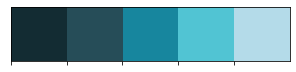

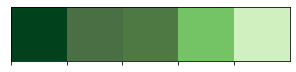

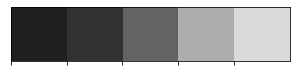

In [17]:
colors_blue = ["#132C33", "#264D58", '#17869E', '#51C4D3', '#B4DBE9']
colors_dark = ["#1F1F1F", "#313131", '#636363', '#AEAEAE', '#DADADA']
colors_green = ['#01411C','#4B6F44','#4F7942','#74C365','#D0F0C0']
sns.palplot(colors_blue)
sns.palplot(colors_green)
sns.palplot(colors_dark)
cm = sns.light_palette('green', as_cmap=True)

In [18]:
def plot_prediction(model, model_name):
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    plt.scatter(y_pred_train, y_train, c = colors_blue[2], label = "Training data")
    plt.scatter(y_pred_test, y_test, c = colors_green[3], marker = "s", label = "Validation data",s=10)
    plt.title(f"Prediction with {model_name}")
    plt.xlabel("Predicted values")
    plt.ylabel("Real values")
    plt.legend(loc = "upper left")
    plt.plot([2, 40], [2, 40], c = "red")
    plt.show()
    
def cross_val(model):
    kfold = KFold(n_splits=10, shuffle=True)
    scoring = ['neg_mean_absolute_error','neg_mean_squared_error','r2']
    kf_cv_scores = cross_validate(model, X_train, y_train, cv=kfold, scoring=scoring)
    print("R2 Score average score: %.5f, std: %.5f" % (kf_cv_scores['test_r2'].mean(), kf_cv_scores['test_r2'].std()) )
    print("MAE average score: %.5f, std: %.5f" % (-kf_cv_scores['test_neg_mean_absolute_error'].mean(),kf_cv_scores['test_neg_mean_absolute_error'].std()))
    print("MSE average score: %.5f, std: %.5f" % (-kf_cv_scores['test_neg_mean_squared_error'].mean(), kf_cv_scores['test_neg_mean_squared_error'].std()))

In [19]:
xgb_reg = xgb.XGBRegressor()
xgb_reg.fit(X_train, y_train)
y_head=xgb_reg.predict(X_test)
print('-'*10+'XGB'+'-'*10)
print('R square Accuracy: ',r2_score(y_test,y_head))
print('Mean Absolute Error Accuracy: ',mean_absolute_error(y_test,y_head))
print('Mean Squared Error Accuracy: ',mean_squared_error(y_test,y_head))

----------XGB----------
R square Accuracy:  0.9796741252821936
Mean Absolute Error Accuracy:  0.9573013540719136
Mean Squared Error Accuracy:  2.0182705991769034


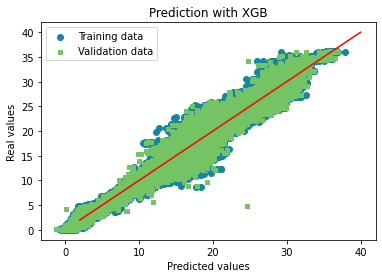

In [20]:
plot_prediction(xgb_reg,"XGB")

Offline

In [21]:
y_off = data1_offline['Penicillin concentration(P:g/L)']
X_off = data1_offline.drop(['Penicillin concentration(P:g/L)'],axis = 1)
y_off,X_off

(4         0.000998
 59        0.000967
 119       0.000911
 179       1.331600
 239       3.457800
             ...   
 113744    7.235200
 113804    6.731000
 113864    6.197900
 113924    5.703000
 113934    5.626300
 Name: Penicillin concentration(P:g/L), Length: 2062, dtype: float64,
         Time (h)  Aeration rate(Fg:L/h)  Agitator RPM(RPM:RPM)  \
 4            1.0                   30.0                  100.0   
 59          12.0                   42.0                  100.0   
 119         24.0                   55.0                  100.0   
 179         36.0                   55.0                  100.0   
 239         48.0                   60.0                  100.0   
 ...          ...                    ...                    ...   
 113744     192.0                   75.0                  100.0   
 113804     204.0                   65.0                  100.0   
 113864     216.0                   65.0                  100.0   
 113924     228.0                   65.0

In [22]:
X_off['Sugar mass flow'] = X_off['Sugar feed rate(Fs:L/h)']*X_off['Substrate concentration(S:g/L)']

In [23]:
X_off = X_off[Col1]

In [24]:
scaled = StandardScaler()
X_off = scaled.fit_transform(X_off)

In [25]:
y_head=xgb_reg.predict(X_off)
print('-'*10+'XGB'+'-'*10)
print('R square Accuracy: ',r2_score(y_off,y_head))
print('Mean Absolute Error Accuracy: ',mean_absolute_error(y_off,y_head))
print('Mean Squared Error Accuracy: ',mean_squared_error(y_off,y_head))

----------XGB----------
R square Accuracy:  0.9073028395790587
Mean Absolute Error Accuracy:  2.231051026639747
Mean Squared Error Accuracy:  9.745180649104938


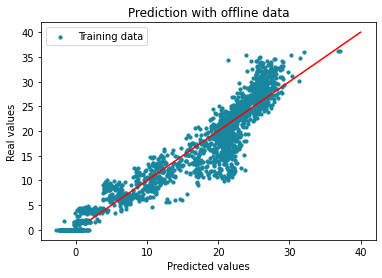

In [26]:
plt.scatter(y_head, y_off, c = colors_blue[2], label = "Training data",s = 10)

plt.title(f"Prediction with offline data")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([2, 40], [2, 40], c = "red")
plt.show()

In [27]:
# from sklearn.svm import SVR
# svm = SVR(kernel='rbf')
# svm.fit(X_train,y_train)
# y_head=svm.predict(X_test)
# print('-'*10+'SVM'+'-'*10)
# print('R square Accuracy: ',r2_score(y_test,y_head))
# print('Mean Absolute Error Accuracy: ',mean_absolute_error(y_test,y_head))
# print('Mean Squared Error Accuracy: ',mean_squared_error(y_test,y_head))

In [28]:
# plot_prediction(svm,"SVM")

#### ADA BOOST

In [29]:
X_train

array([[-0.28918406, -0.35243318,  0.16852677, ...,  0.77845752,
        -0.12399757,  0.16852677],
       [-0.28912137, -0.03112213, -0.18528551, ...,  0.38844236,
         0.01017328, -0.18528551],
       [-0.28910532,  0.61149995, -0.79182085, ...,  0.19831869,
        -0.00659808, -0.79182085],
       ...,
       [-0.28896733, -0.35243318,  1.38159745, ...,  0.78671366,
        -0.22462571,  1.38159745],
       [-0.28912159, -0.35243318,  0.57288366, ...,  1.03788621,
        -0.13009625,  0.57288366],
       [-0.28913895, -0.99505527,  0.11798216, ..., -1.43244239,
         0.59107206,  0.11798216]])

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
adb = AdaBoostRegressor()
adb.fit(X_train,y_train)
y_head=adb.predict(X_test)
print('-'*10+'ADABOOST'+'-'*10)
print('R square Accuracy: ',r2_score(y_test,y_head))
print('Mean Absolute Error Accuracy: ',mean_absolute_error(y_test,y_head))
print('Mean Squared Error Accuracy: ',mean_squared_error(y_test,y_head))

In [ ]:
Pen_con_pre = variable_raman_data_pre [0]
Pen_con_pre['y_pen_pre'] = y_pre_pen
Pen_con_pre


,Time (h),Aeration rate(Fg:L/h),Agitator RPM(RPM:RPM),Sugar feed rate(Fs:L/h),Acid flow rate(Fa:L/h),Base flow rate(Fb:L/h),Heating/cooling water flow rate(Fc:L/h),Heating water flow rate(Fh:L/h),Water for injection/dilution(Fw:L/h),Air head pressure(pressure:bar),...,Fault reference(Fault_ref:Fault ref),0 - Recipe driven 1 - Operator controlled(Control_ref:Control ref),1- No Raman spec,1-Raman spec recorded,2-PAT control(PAT_ref:PAT ref),Batch reference(Batch_ref:Batch ref),Batch ID,Fault flag,y_pen_pre,Sugar mass flow
0,0.2,30.0,100.0,8.0,0.0000,30.1180,9.8335,0.00010,0.0,0.6,...,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,3.860665,7.65992
1,0.4,30.0,100.0,8.0,0.0000,51.2210,18.1550,0.00010,0.0,0.6,...,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,3.860665,8.03680
2,0.6,30.0,100.0,8.0,0.0000,54.3020,9.5982,0.00010,0.0,0.6,...,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,3.860665,8.39840
3,0.8,30.0,100.0,8.0,0.0000,37.8160,4.3395,0.00010,0.0,0.6,...,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,3.860665,8.75360
5,1.2,30.0,100.0,8.0,1.0387,9.4541,0.0001,0.00010,0.0,0.6,...,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,3.860665,9.42560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113929,229.0,65.0,100.0,80.0,0.0000,14.6420,9.7624,59.35900,250.0,0.9,...,0.0,0.0,1.0,100.0,100.0,1.0,44895.0,45241.0,4.696386,5811.52000
113930,229.2,65.0,100.0,80.0,0.0000,12.9000,33.5860,5.93590,250.0,0.9,...,0.0,0.0,1.0,100.0,100.0,1.0,43854.0,44034.0,5.308737,5816.64000
113931,229.4,65.0,100.0,80.0,0.0000,10.0470,10.0760,98.83400,250.0,0.9,...,0.0,0.0,1.0,100.0,100.0,1.0,44814.0,44659.0,5.524529,5821.92000
113932,229.6,65.0,100.0,80.0,0.0000,7.3609,69.3450,9.88340,250.0,0.9,...,0.0,0.0,1.0,100.0,100.0,1.0,44273.0,43952.0,5.021711,5827.36000


In [ ]:
Pen_con_pre['Sugar mass flow'] = Pen_con_pre['Sugar feed rate(Fs:L/h)']*Pen_con_pre['Substrate concentration(S:g/L)']

In [ ]:
Col1=['Sugar mass flow','Water for injection/dilution(Fw:L/h)','Temperature(T:K)','Dissolved oxygen concentration(DO2:mg/L)','Vessel Volume(V:L)','pH(pH:pH)','Temperature(T:K)','y_pen_pre'] 

In [ ]:
data_new = Pen_con_pre[Col1]

In [ ]:
data_new

,Sugar mass flow,Water for injection/dilution(Fw:L/h),Temperature(T:K),Dissolved oxygen concentration(DO2:mg/L),Vessel Volume(V:L),pH(pH:pH),Temperature(T:K),y_pen_pre
0,7.65992,0.0,298.22,14.711,58479.0,6.4472,298.22,-4.749680
1,8.03680,0.0,298.17,14.699,58487.0,6.4932,298.17,-4.749680
2,8.39840,0.0,298.14,14.686,58495.0,6.5425,298.14,-4.749680
3,8.75360,0.0,298.11,14.661,58499.0,6.5753,298.11,-4.749680
5,9.42560,0.0,298.08,14.621,58500.0,6.5717,298.08,-4.749680
...,...,...,...,...,...,...,...,...
113929,5811.52000,250.0,297.97,13.389,74008.0,6.5057,297.97,455.551224
113930,5816.64000,250.0,297.89,13.385,74071.0,6.5085,297.89,407.340791
113931,5821.92000,250.0,298.07,13.388,74133.0,6.5080,298.07,449.298722
113932,5827.36000,250.0,297.98,13.390,74194.0,6.5040,297.98,458.678560


In [ ]:
from sklearn.preprocessing import StandardScaler

scaled = StandardScaler()
y = data_new['y_pen_pre']
X = data_new.drop(['y_pen_pre'],axis = 1)
X = scaled.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split, cross_validate
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV, KFold,GridSearchCV
from sklearn.preprocessing import StandardScaler,RobustScaler,LabelEncoder,PowerTransformer, PolynomialFeatures
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1234)
print('X_train Shape :',X_train.shape)
print('X_test Shape :',X_test.shape)
print('y_train Shape :',y_train.shape)
print('y_test Shape :',y_test.shape)

X_train Shape : (89498, 7)
X_test Shape : (22375, 7)
y_train Shape : (89498,)
y_test Shape : (22375,)


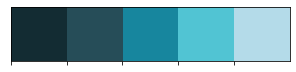

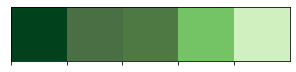

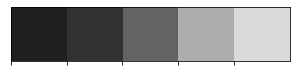

In [ ]:
colors_blue = ["#132C33", "#264D58", '#17869E', '#51C4D3', '#B4DBE9']
colors_dark = ["#1F1F1F", "#313131", '#636363', '#AEAEAE', '#DADADA']
colors_green = ['#01411C','#4B6F44','#4F7942','#74C365','#D0F0C0']
sns.palplot(colors_blue)
sns.palplot(colors_green)
sns.palplot(colors_dark)
cm = sns.light_palette('green', as_cmap=True)

In [ ]:
def plot_prediction(model, model_name):
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    plt.scatter(y_pred_train, y_train, c = colors_blue[2], label = "Training data")
    plt.scatter(y_pred_test, y_test, c = colors_green[3], marker = "s", label = "Validation data")
    plt.title(f"Prediction with {model_name}")
    plt.xlabel("Predicted values")
    plt.ylabel("Real values")
    plt.legend(loc = "upper left")
    plt.plot([2, 40], [2, 40], c = "red")
    plt.show()
    
def cross_val(model):
    kfold = KFold(n_splits=10, shuffle=True)
    scoring = ['neg_mean_absolute_error','neg_mean_squared_error','r2']
    kf_cv_scores = cross_validate(model, X_train, y_train, cv=kfold, scoring=scoring)
    print("R2 Score average score: %.5f, std: %.5f" % (kf_cv_scores['test_r2'].mean(), kf_cv_scores['test_r2'].std()) )
    print("MAE average score: %.5f, std: %.5f" % (-kf_cv_scores['test_neg_mean_absolute_error'].mean(),kf_cv_scores['test_neg_mean_absolute_error'].std()))
    print("MSE average score: %.5f, std: %.5f" % (-kf_cv_scores['test_neg_mean_squared_error'].mean(), kf_cv_scores['test_neg_mean_squared_error'].std()))

In [ ]:
xgb_reg = xgb.XGBRegressor()
xgb_reg.fit(X_train, y_train)
y_head=xgb_reg.predict(X_test)
print('-'*10+'XGB'+'-'*10)
print('R square Accuracy: ',r2_score(y_test,y_head))
print('Mean Absolute Error Accuracy: ',mean_absolute_error(y_test,y_head))
print('Mean Squared Error Accuracy: ',mean_squared_error(y_test,y_head))

----------XGB----------
R square Accuracy:  0.9763422197404055
Mean Absolute Error Accuracy:  1.0981262176174578
Mean Squared Error Accuracy:  2.3366249498156075


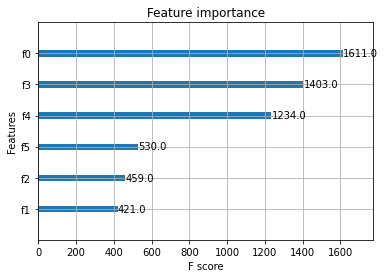

In [ ]:
from xgboost import plot_importance
# plot feature importance
plot_importance(xgb_reg)
plt.show()

In [ ]:
cross_val(xgb_reg)

R2 Score average score: 0.97595, std: 0.00061
MAE average score: 1.09864, std: 0.01058
MSE average score: 2.35161, std: 0.05144


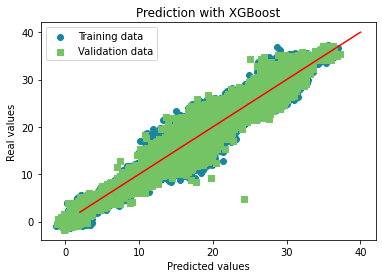

In [ ]:
plot_prediction(xgb_reg, model_name='XGBoost')

tunning XGB

In [ ]:
params = { 'max_depth': [20,50],
        'learning_rate': [ 0.1,0.15],
        }
#  'n_estimators': [100, 500, 1000],
#        'colsample_bytree': [0.3, 0.7]


xgbr = xgb.XGBRegressor(seed = 20)
clf = GridSearchCV(estimator=xgbr, 
                param_grid=params,
                scoring='neg_mean_squared_error', 
                verbose=1)

clf.fit(X_train,y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


KeyboardInterrupt: 

#### PAA


In [ ]:
PAA_con_pre = []

In [ ]:
variable_raman_data_pre [0]

,Time (h),Aeration rate(Fg:L/h),Agitator RPM(RPM:RPM),Sugar feed rate(Fs:L/h),Acid flow rate(Fa:L/h),Base flow rate(Fb:L/h),Heating/cooling water flow rate(Fc:L/h),Heating water flow rate(Fh:L/h),Water for injection/dilution(Fw:L/h),Air head pressure(pressure:bar),...,0 - Recipe driven 1 - Operator controlled(Control_ref:Control ref),1- No Raman spec,1-Raman spec recorded,2-PAT control(PAT_ref:PAT ref),Batch reference(Batch_ref:Batch ref),Batch ID,Fault flag,y_pen_pre,Sugar mass flow,y_PAA_pre
0,0.2,30.0,100.0,8.0,0.0000,30.1180,9.8335,0.00010,0.0,0.6,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,3.860665,7.65992,1392.943013
1,0.4,30.0,100.0,8.0,0.0000,51.2210,18.1550,0.00010,0.0,0.6,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,3.860665,8.03680,1392.943013
2,0.6,30.0,100.0,8.0,0.0000,54.3020,9.5982,0.00010,0.0,0.6,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,3.860665,8.39840,1392.943013
3,0.8,30.0,100.0,8.0,0.0000,37.8160,4.3395,0.00010,0.0,0.6,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,3.860665,8.75360,1392.943013
5,1.2,30.0,100.0,8.0,1.0387,9.4541,0.0001,0.00010,0.0,0.6,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,3.860665,9.42560,1392.943013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113929,229.0,65.0,100.0,80.0,0.0000,14.6420,9.7624,59.35900,250.0,0.9,...,0.0,1.0,100.0,100.0,1.0,44895.0,45241.0,4.696386,5811.52000,7423.516450
113930,229.2,65.0,100.0,80.0,0.0000,12.9000,33.5860,5.93590,250.0,0.9,...,0.0,1.0,100.0,100.0,1.0,43854.0,44034.0,5.308737,5816.64000,7599.379598
113931,229.4,65.0,100.0,80.0,0.0000,10.0470,10.0760,98.83400,250.0,0.9,...,0.0,1.0,100.0,100.0,1.0,44814.0,44659.0,5.524529,5821.92000,7456.580247
113932,229.6,65.0,100.0,80.0,0.0000,7.3609,69.3450,9.88340,250.0,0.9,...,0.0,1.0,100.0,100.0,1.0,44273.0,43952.0,5.021711,5827.36000,7414.402296


In [ ]:
PAA_con_pre = variable_raman_data_pre [0]
PAA_con_pre['y_PAA_pre'] = y_pre_PAA
PAA_con_pre

,Time (h),Aeration rate(Fg:L/h),Agitator RPM(RPM:RPM),Sugar feed rate(Fs:L/h),Acid flow rate(Fa:L/h),Base flow rate(Fb:L/h),Heating/cooling water flow rate(Fc:L/h),Heating water flow rate(Fh:L/h),Water for injection/dilution(Fw:L/h),Air head pressure(pressure:bar),...,0 - Recipe driven 1 - Operator controlled(Control_ref:Control ref),1- No Raman spec,1-Raman spec recorded,2-PAT control(PAT_ref:PAT ref),Batch reference(Batch_ref:Batch ref),Batch ID,Fault flag,y_pen_pre,Sugar mass flow,y_PAA_pre
0,0.2,30.0,100.0,8.0,0.0000,30.1180,9.8335,0.00010,0.0,0.6,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,3.860665,7.65992,1392.943013
1,0.4,30.0,100.0,8.0,0.0000,51.2210,18.1550,0.00010,0.0,0.6,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,3.860665,8.03680,1392.943013
2,0.6,30.0,100.0,8.0,0.0000,54.3020,9.5982,0.00010,0.0,0.6,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,3.860665,8.39840,1392.943013
3,0.8,30.0,100.0,8.0,0.0000,37.8160,4.3395,0.00010,0.0,0.6,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,3.860665,8.75360,1392.943013
5,1.2,30.0,100.0,8.0,1.0387,9.4541,0.0001,0.00010,0.0,0.6,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,3.860665,9.42560,1392.943013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113929,229.0,65.0,100.0,80.0,0.0000,14.6420,9.7624,59.35900,250.0,0.9,...,0.0,1.0,100.0,100.0,1.0,44895.0,45241.0,4.696386,5811.52000,7423.516450
113930,229.2,65.0,100.0,80.0,0.0000,12.9000,33.5860,5.93590,250.0,0.9,...,0.0,1.0,100.0,100.0,1.0,43854.0,44034.0,5.308737,5816.64000,7599.379598
113931,229.4,65.0,100.0,80.0,0.0000,10.0470,10.0760,98.83400,250.0,0.9,...,0.0,1.0,100.0,100.0,1.0,44814.0,44659.0,5.524529,5821.92000,7456.580247
113932,229.6,65.0,100.0,80.0,0.0000,7.3609,69.3450,9.88340,250.0,0.9,...,0.0,1.0,100.0,100.0,1.0,44273.0,43952.0,5.021711,5827.36000,7414.402296


In [ ]:
PAA_con_pre['Sugar mass flow'] = PAA_con_pre['Sugar feed rate(Fs:L/h)']*PAA_con_pre['Substrate concentration(S:g/L)']
Col1=['Sugar mass flow','Water for injection/dilution(Fw:L/h)','Temperature(T:K)','Dissolved oxygen concentration(DO2:mg/L)','Vessel Volume(V:L)','pH(pH:pH)','Temperature(T:K)','y_pen_pre'] 
data_new = PAA_con_pre[Col1]

In [ ]:
data_new

,Sugar mass flow,Water for injection/dilution(Fw:L/h),Temperature(T:K),Dissolved oxygen concentration(DO2:mg/L),Vessel Volume(V:L),pH(pH:pH),Temperature(T:K),y_pen_pre
0,7.65992,0.0,298.22,14.711,58479.0,6.4472,298.22,3.860665
1,8.03680,0.0,298.17,14.699,58487.0,6.4932,298.17,3.860665
2,8.39840,0.0,298.14,14.686,58495.0,6.5425,298.14,3.860665
3,8.75360,0.0,298.11,14.661,58499.0,6.5753,298.11,3.860665
5,9.42560,0.0,298.08,14.621,58500.0,6.5717,298.08,3.860665
...,...,...,...,...,...,...,...,...
113929,5811.52000,250.0,297.97,13.389,74008.0,6.5057,297.97,4.696386
113930,5816.64000,250.0,297.89,13.385,74071.0,6.5085,297.89,5.308737
113931,5821.92000,250.0,298.07,13.388,74133.0,6.5080,298.07,5.524529
113932,5827.36000,250.0,297.98,13.390,74194.0,6.5040,297.98,5.021711


In [ ]:
scaled = StandardScaler()
y = data_new['y_PAA_pre']
X = data_new.drop(['y_PAA_pre'],axis = 1)
X = scaled.fit_transform(X)

KeyError: 'y_PAA_pre'